# Diabetes Detection Model
This notebook demonstrates the process of building a diabetes detection model using machine learning. It includes data preprocessing, exploratory data analysis, feature engineering, model training, and evaluation.

## Import Libraries
Import all the necessary libraries for data manipulation, visualization, and machine learning.

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

## Load Dataset
Load the diabetes dataset and display its basic information.

In [12]:
# Load the dataset
df = pd.read_csv('data/Dataset of Diabetes .csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head(20))


Dataset Shape: (1000, 14)

First 5 rows:


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
5,634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
6,721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
7,421,34227,M,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,N
8,670,34229,M,43,2.6,67,4.0,3.8,0.9,2.4,3.7,1.0,21.0,N
9,759,34230,F,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24.0,N


## Data Exploration
Explore the dataset to understand its structure, check for missing values, duplicates, and class distribution.

In [13]:
# Check data types and missing values
print("\nData Types and Non-Null Count:")
display(df.info())


Data Types and Non-Null Count:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


None

In [14]:
# Statistical summary
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [15]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
display(missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Missing Values per Column:


ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

Number of duplicate rows: 0


In [16]:
# Check the distribution of the target classes
print("\nTarget Class Distribution:")
class_counts = df['CLASS'].value_counts()
display(class_counts)
print(f"Percentage of each class: \n{(class_counts/len(df)*100).round(2)}%")


Target Class Distribution:


CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

Percentage of each class: 
CLASS
Y     84.0
N     10.2
P      5.3
Y      0.4
N      0.1
Name: count, dtype: float64%



--- Exploring Relationships Between Features and Target (CLASS) ---


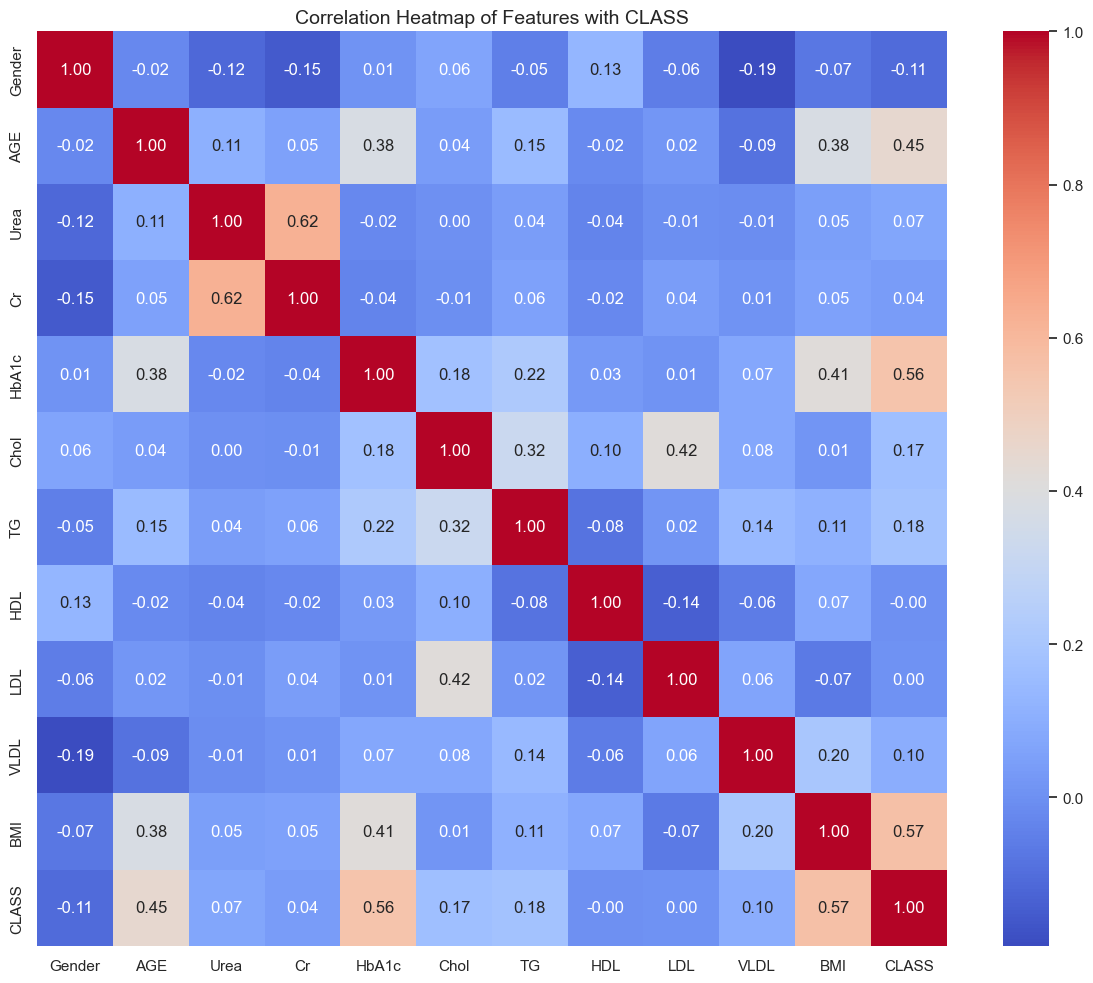

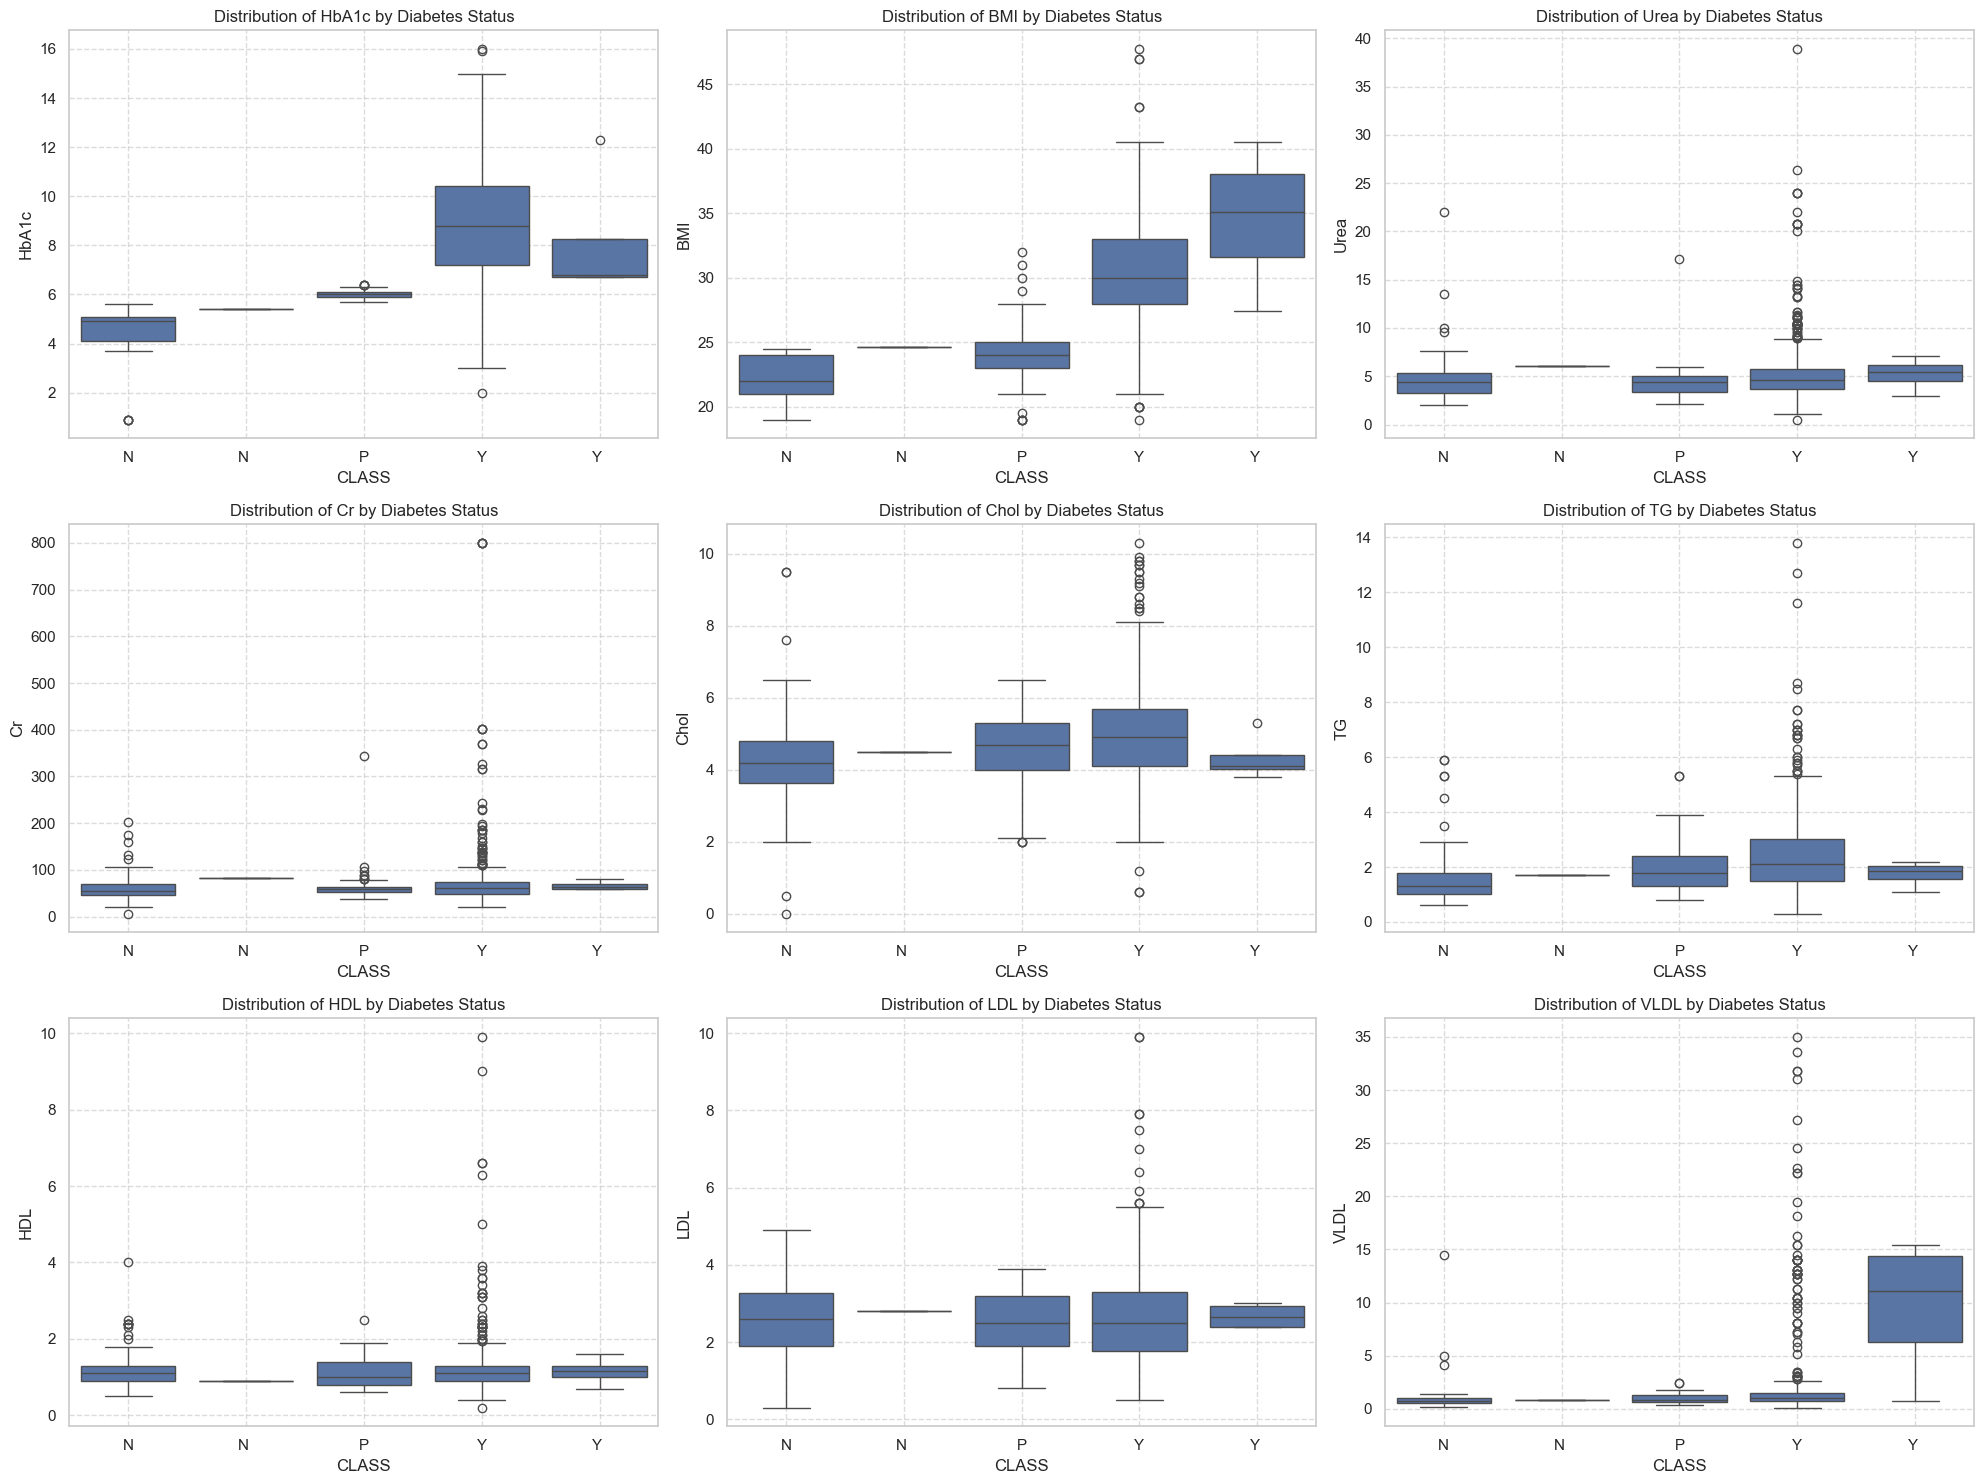

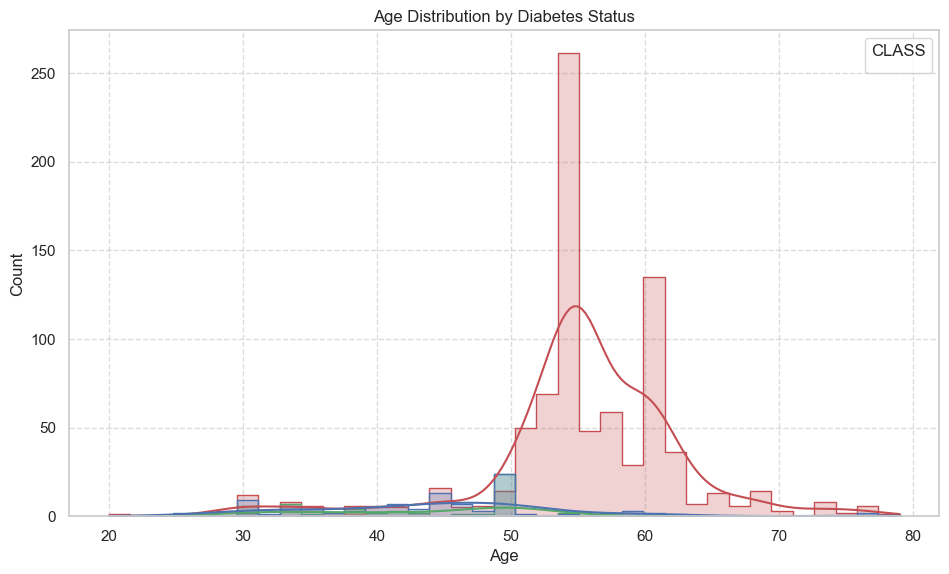

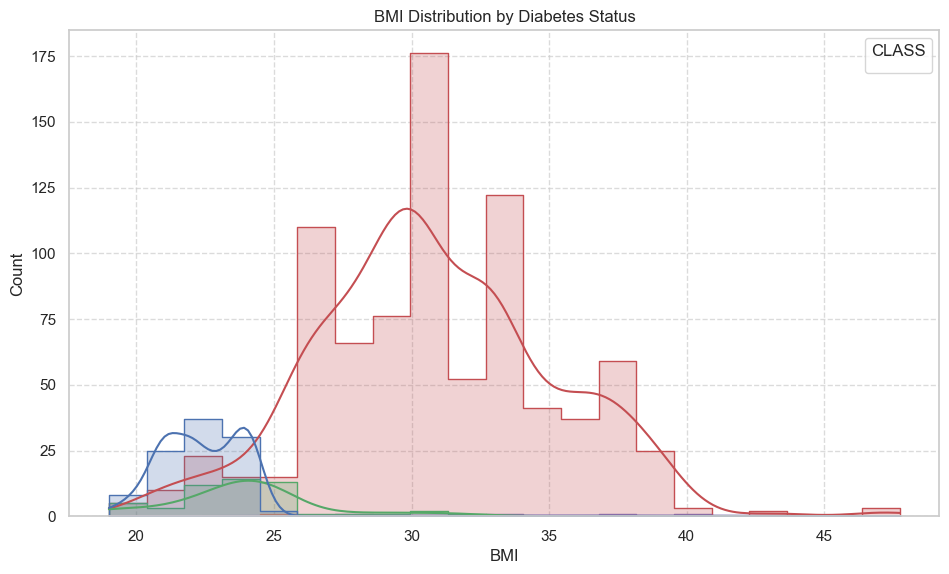

<Figure size 800x600 with 0 Axes>

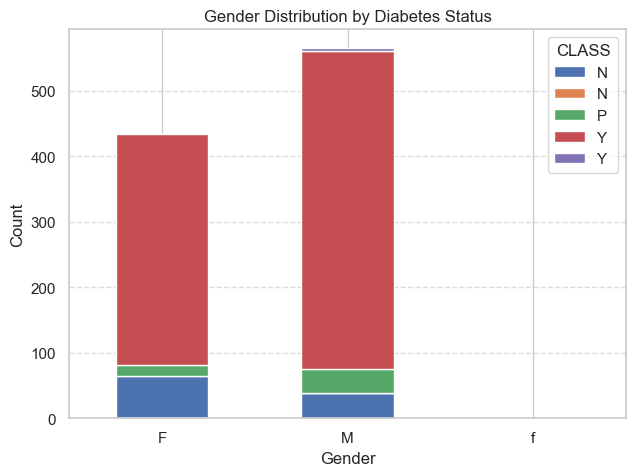

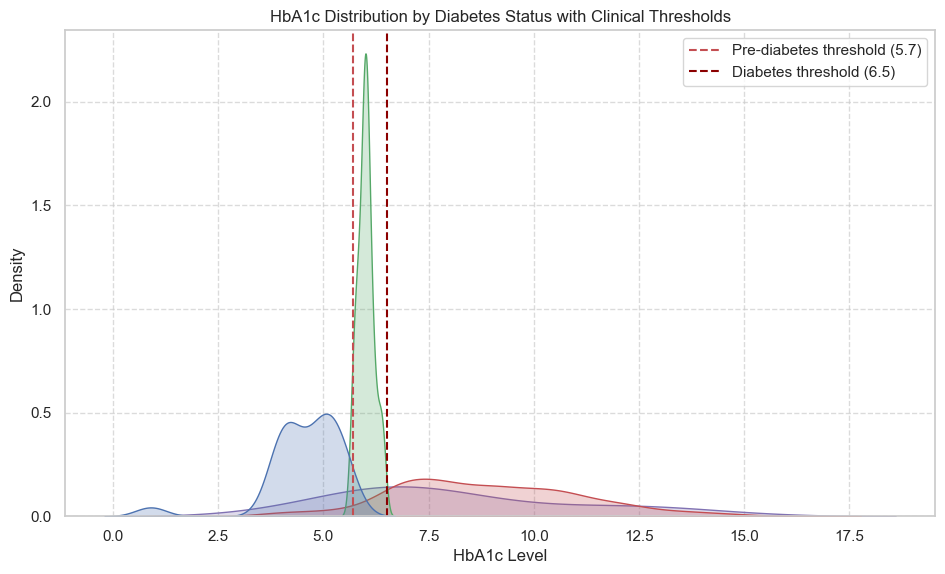

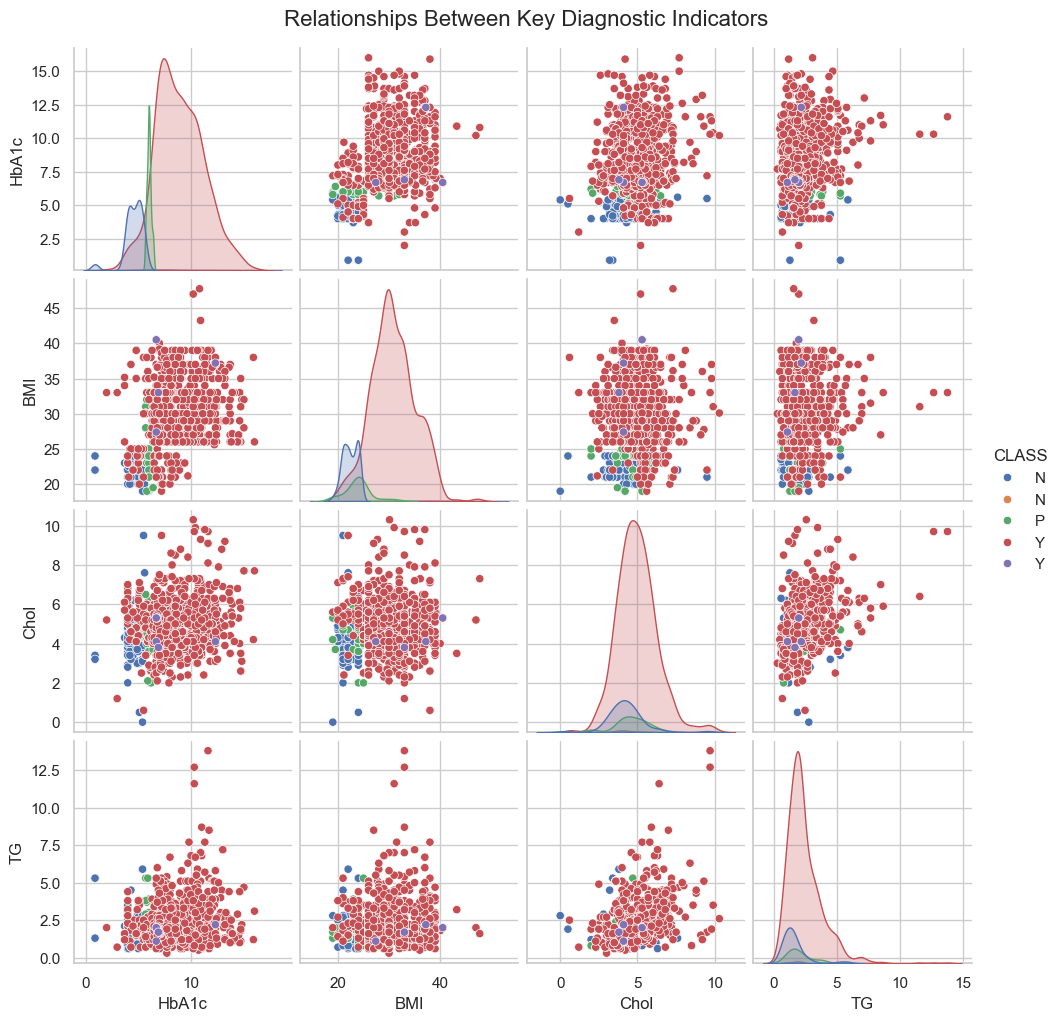

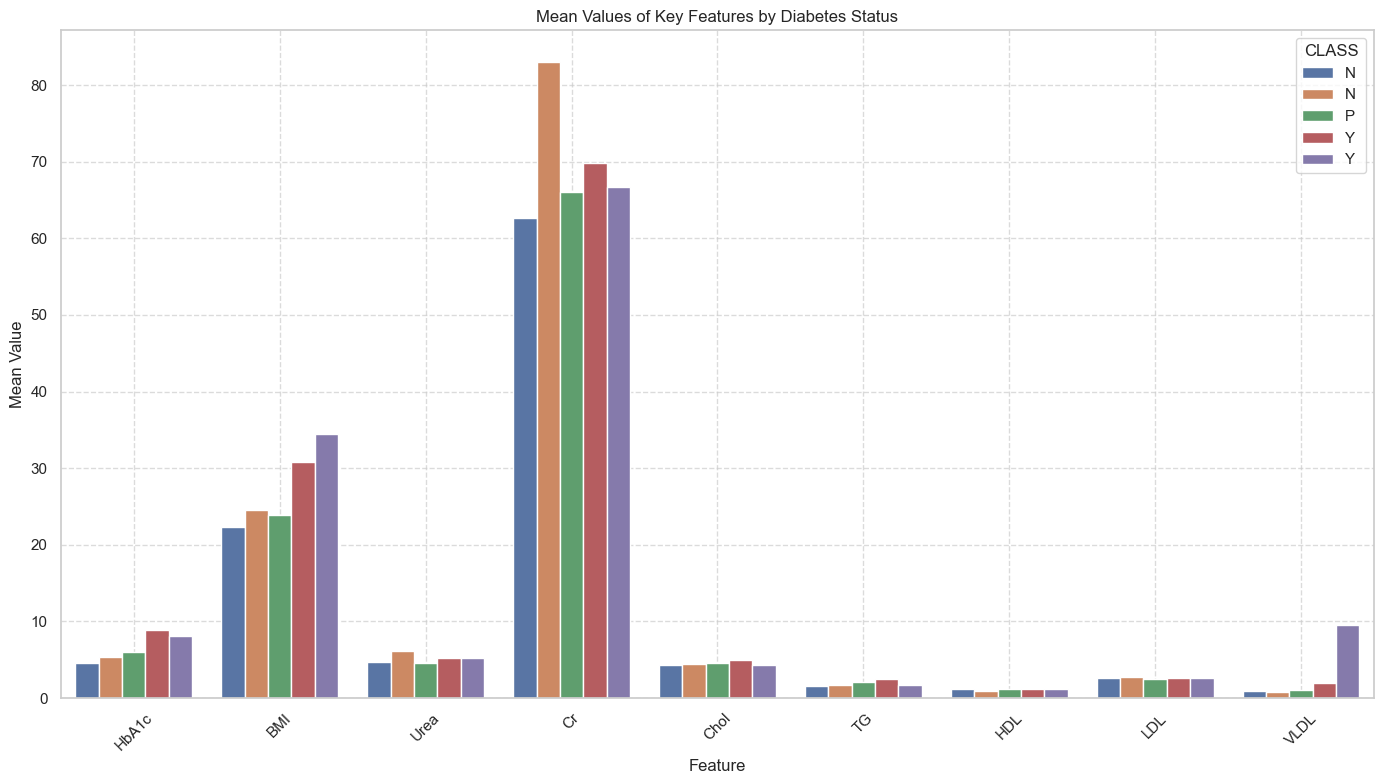

In [24]:
# Add exploratory visualizations to understand relationships between features and target
print("\n--- Exploring Relationships Between Features and Target (CLASS) ---")

# 1. Correlation Heatmap - Shows relationships between all variables
plt.figure(figsize=(12, 10))
# Convert categorical variables to numeric for correlation
df_corr = df.copy()
df_corr['Gender'] = df_corr['Gender'].map({'M': 0, 'F': 1})

# Map CLASS to numeric values (if needed for correlation)
class_mapping = {'N': 0, 'P': 1, 'Y': 2}
df_corr['CLASS'] = df_corr['CLASS'].map(class_mapping)
# Calculate correlation matrix
correlation_matrix = df_corr.drop(['ID', 'No_Pation'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features with CLASS', fontsize=14)
plt.tight_layout()
plt.show()

# 2. Key medical indicators by CLASS
plt.figure(figsize=(20, 15))
key_features = ['HbA1c', 'BMI', 'Urea', 'Cr', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL']
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='CLASS', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Diabetes Status')
    plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Age distribution by diabetes class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AGE', hue='CLASS', kde=True, element="step")
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='CLASS')
plt.show()

# 4. Comparison of BMI across classes
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BMI', hue='CLASS', kde=True, element="step")
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('BMI')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='CLASS')
plt.show()

# 5. Gender distribution by CLASS
plt.figure(figsize=(8, 6))
gender_class = pd.crosstab(df['Gender'], df['CLASS'])
gender_class.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Diabetes Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='CLASS')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 6. HbA1c is a critical diabetes indicator - show its distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='HbA1c', hue='CLASS', fill=True, common_norm=False)
plt.axvline(x=5.7, color='r', linestyle='--', label='Pre-diabetes threshold (5.7)')
plt.axvline(x=6.5, color='darkred', linestyle='--', label='Diabetes threshold (6.5)')
plt.title('HbA1c Distribution by Diabetes Status with Clinical Thresholds')
plt.xlabel('HbA1c Level')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 7. Pair plot of key diagnostic indicators
sns.pairplot(df[['HbA1c', 'BMI', 'Chol', 'TG', 'CLASS']], hue='CLASS', height=2.5)
plt.suptitle('Relationships Between Key Diagnostic Indicators', y=1.02, fontsize=16)
plt.show()

# 8. Bar chart showing mean values of key markers by CLASS
plt.figure(figsize=(14, 8))
mean_by_class = df.groupby('CLASS')[key_features].mean().reset_index()
mean_by_class_melted = pd.melt(mean_by_class, id_vars=['CLASS'], value_vars=key_features)
sns.barplot(x='variable', y='value', hue='CLASS', data=mean_by_class_melted)
plt.title('Mean Values of Key Features by Diabetes Status')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='CLASS')
plt.tight_layout()
plt.show()

## Data Preprocessing
Handle categorical variables, drop unnecessary columns, and process outliers.

In [25]:
# Handle categorical variables
df_processed = df.copy()
df_processed['Gender'] = df_processed['Gender'].map({'M': 0, 'F': 1})

# Let's drop ID and No_Pation columns as they are just identifiers
df_processed = df_processed.drop(['ID', 'No_Pation'], axis=1)
df_processed.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,0.0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,0.0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [26]:
# Function to handle outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a copy to avoid modifying the original dataframe
    df_clean = df.copy()
    
    # Cap outliers (winsorization)
    df_clean.loc[df_clean[column] > upper_bound, column] = upper_bound
    df_clean.loc[df_clean[column] < lower_bound, column] = lower_bound
    
    return df_clean

# Apply to columns with significant outliers
columns_with_outliers = ['Urea', 'Cr', 'HbA1c', 'VLDL']  # Adjust based on your boxplots
for col in columns_with_outliers:
    df_processed = handle_outliers(df_processed, col)

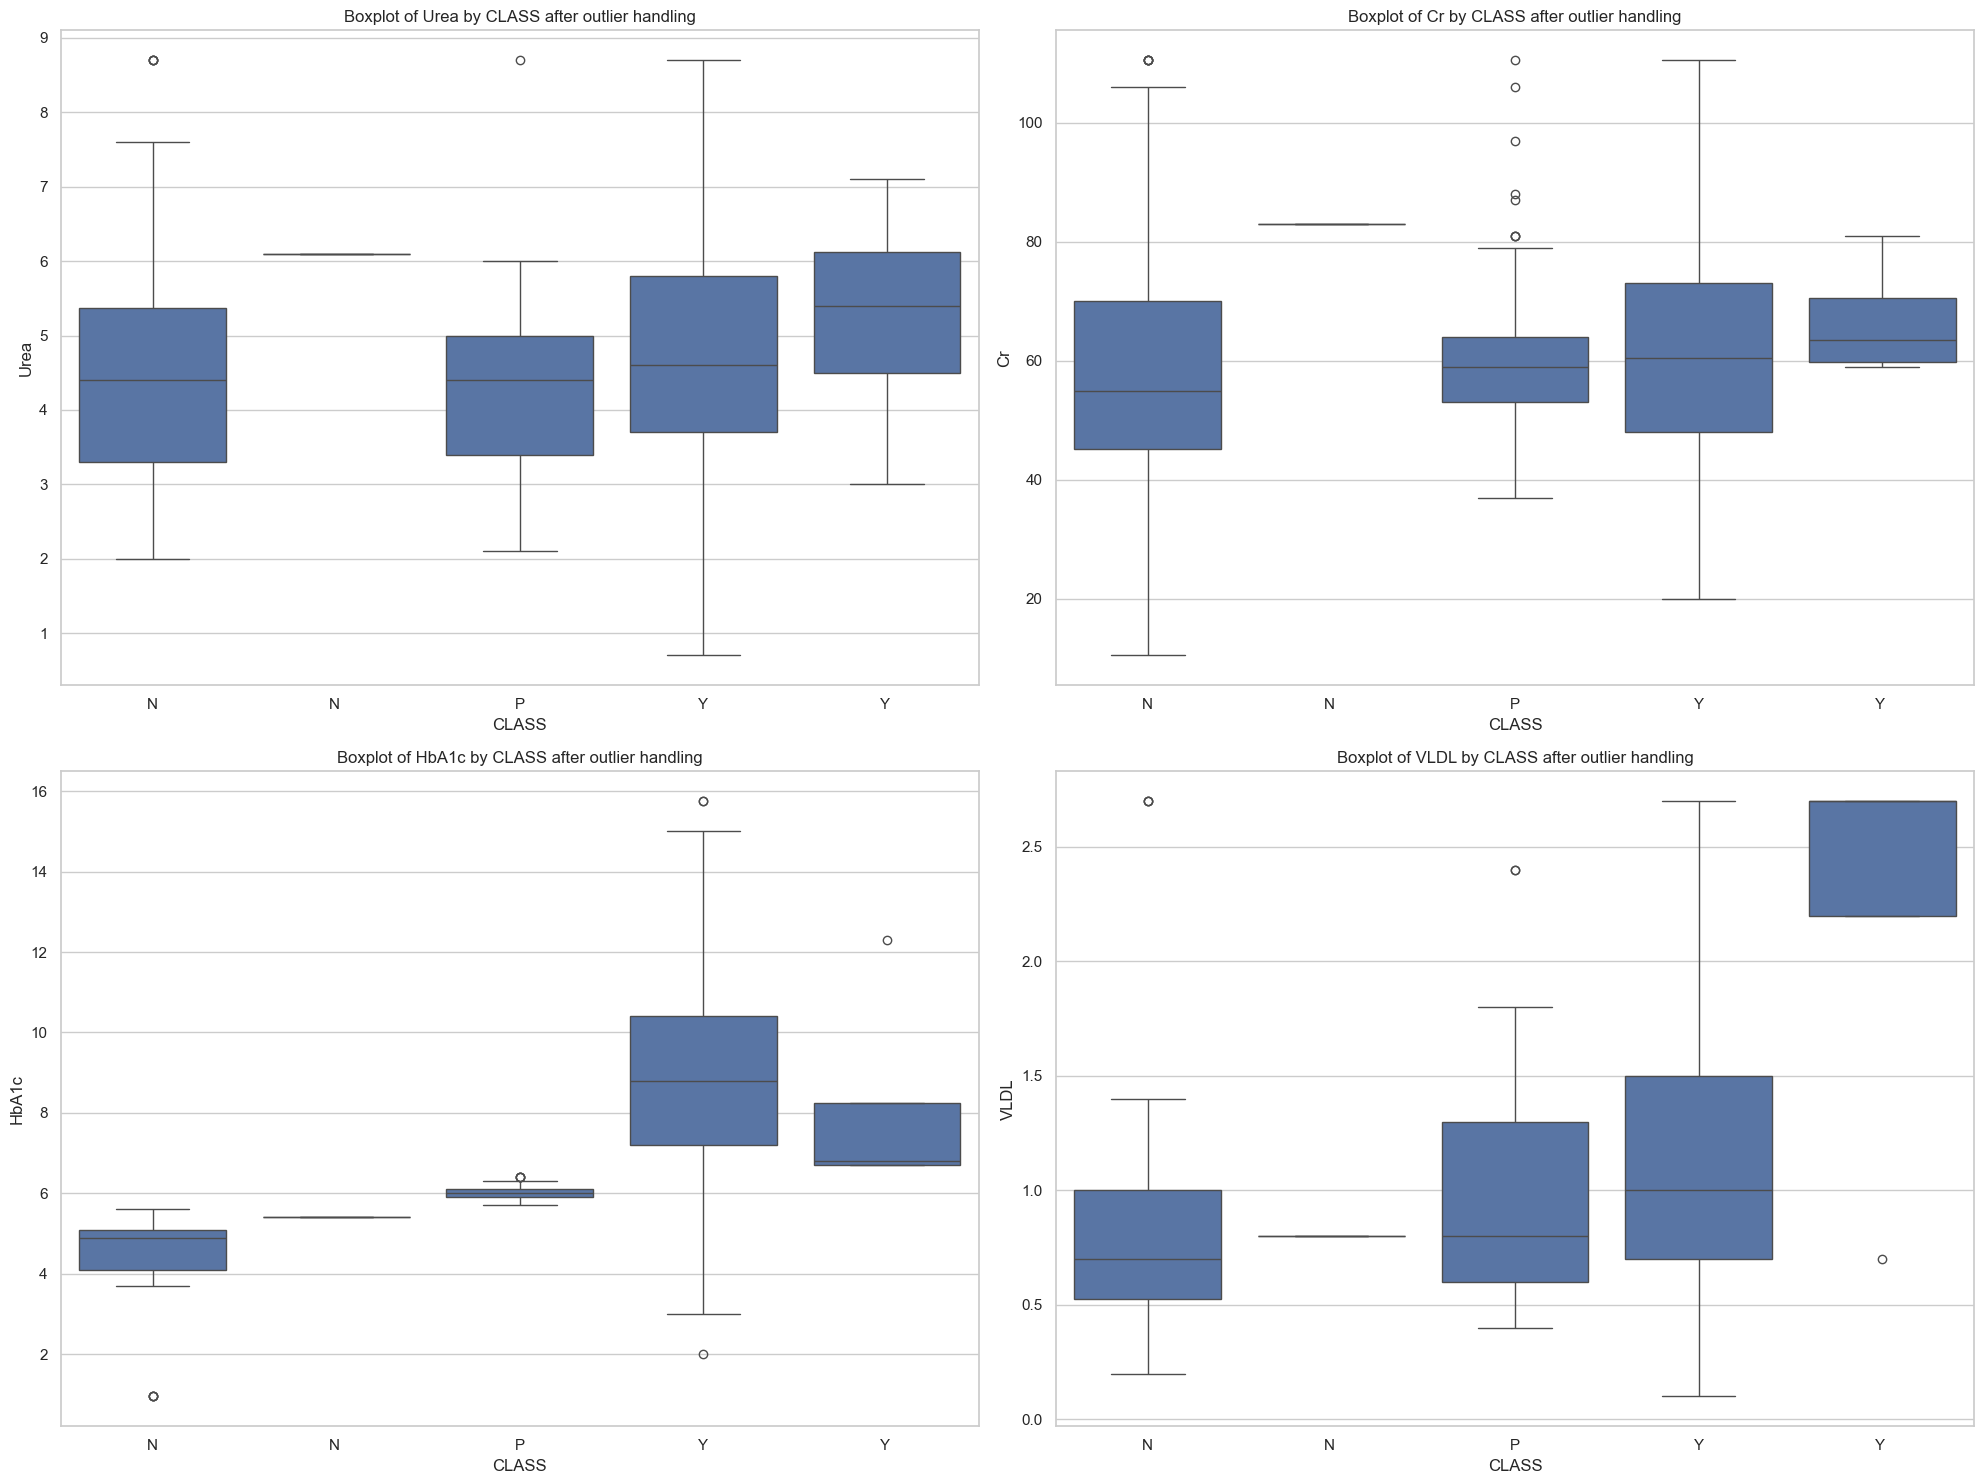

In [27]:
# Verify outlier handling
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='CLASS', y=column, data=df_processed)
    plt.title(f'Boxplot of {column} by CLASS after outlier handling')
plt.tight_layout()
plt.show()

## Feature Engineering
Analyze feature importance and select the most relevant features for the model.

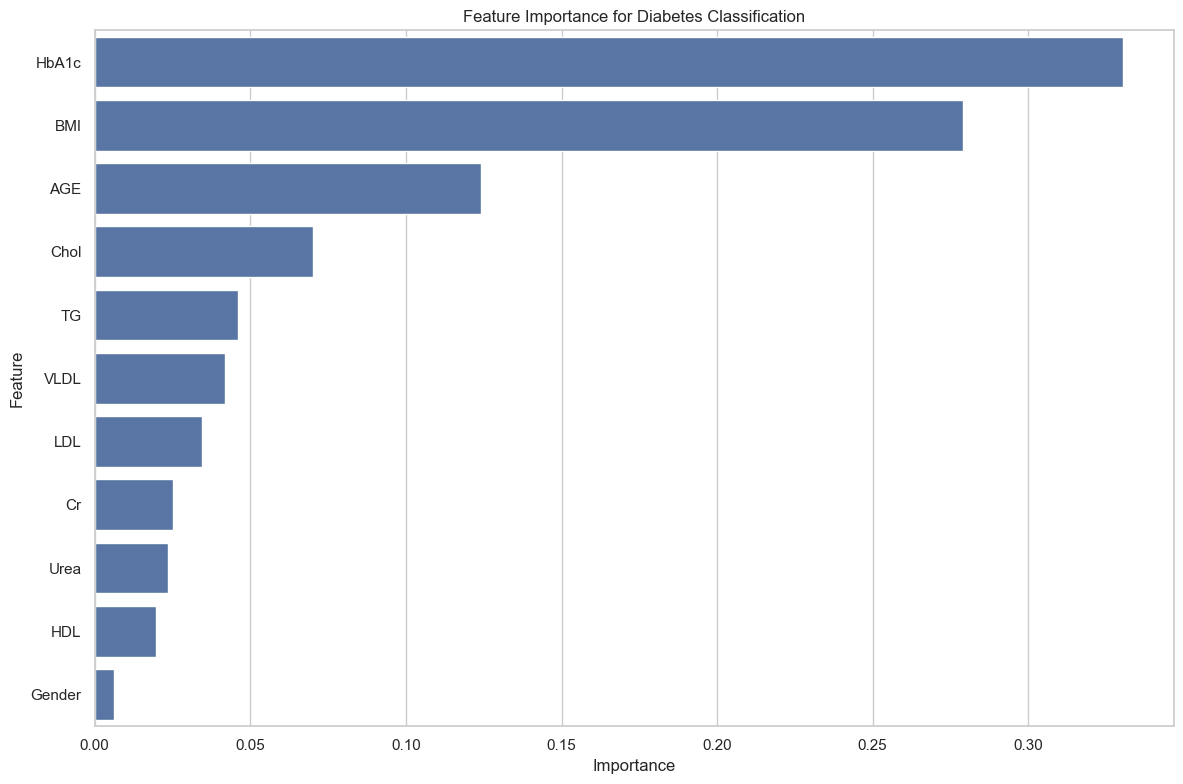

Selected features: ['HbA1c', 'BMI', 'AGE', 'Chol', 'TG', 'VLDL', 'LDL', 'Cr']


In [28]:
# Feature importance using a simple model
from sklearn.ensemble import RandomForestClassifier

X = df_processed.drop('CLASS', axis=1)
y = df_processed['CLASS']

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance for Diabetes Classification')
plt.tight_layout()
plt.show()

# Select top features
top_features = importances['Feature'][:8].tolist()  # Adjust number as needed
X_selected = X[top_features]
print("Selected features:", top_features)

## Data Splitting and Scaling
Split the dataset into training and testing sets, and scale the features.

In [29]:
# Split the data without stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # Removed stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Check class distribution in train and test sets
print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in test set:")
print(y_test.value_counts())

Training set shape: (800, 11)
Testing set shape: (200, 11)

Class distribution in training set:
CLASS
Y     668
N      81
P      47
Y       3
N       1
Name: count, dtype: int64

Class distribution in test set:
CLASS
Y     172
N      21
P       6
Y       1
Name: count, dtype: int64


In [31]:
# Add this code after the data scaling section and before model training

# Check for missing values after preprocessing
print("Missing values before preprocessing:")
print(X_train_scaled.isna().sum())

# Import the imputer
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'

# Apply imputation to training and testing data
X_train_imputed = pd.DataFrame(
    imputer.fit_transform(X_train_scaled),
    columns=X_train_scaled.columns
)

X_test_imputed = pd.DataFrame(
    imputer.transform(X_test_scaled),
    columns=X_test_scaled.columns
)

# Verify no missing values remain
print("\nMissing values after imputation:")
print(X_train_imputed.isna().sum().sum())
print(X_test_imputed.isna().sum().sum())

# Use the imputed data for model training
X_train_final = X_train_imputed
X_test_final = X_test_imputed

Missing values before preprocessing:
Gender    1
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
dtype: int64

Missing values after imputation:
0
0


## Model Training and Evaluation
Train multiple models, evaluate their performance, and compare their accuracies.


--------------------------------------------------
Evaluating Logistic Regression...
Accuracy: 0.9300

Classification Report:
              precision    recall  f1-score   support

           N       0.73      0.90      0.81        21
           P       0.50      0.17      0.25         6
           Y       0.97      0.97      0.97       172
          Y        0.00      0.00      0.00         1

    accuracy                           0.93       200
   macro avg       0.55      0.51      0.51       200
weighted avg       0.92      0.93      0.92       200



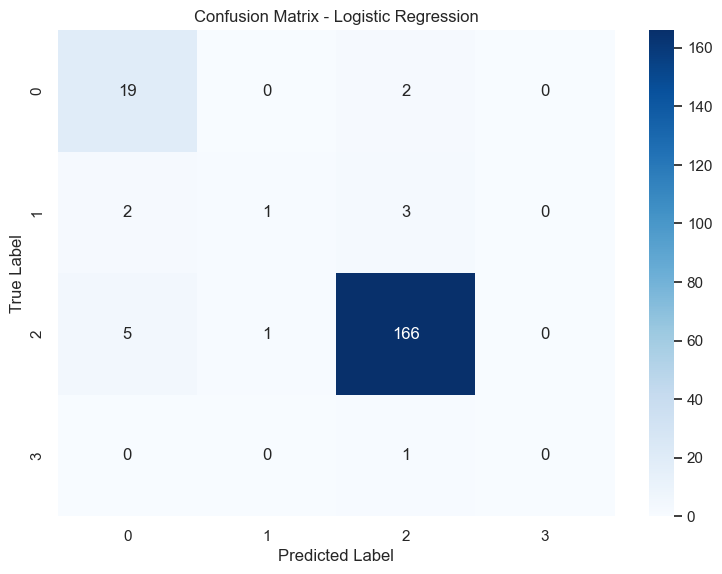


--------------------------------------------------
Evaluating Random Forest...
Accuracy: 0.9750

Classification Report:
              precision    recall  f1-score   support

           N       0.88      1.00      0.93        21
           P       1.00      0.83      0.91         6
           Y       0.99      0.98      0.99       172
          Y        0.00      0.00      0.00         1

    accuracy                           0.97       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.97      0.97      0.97       200



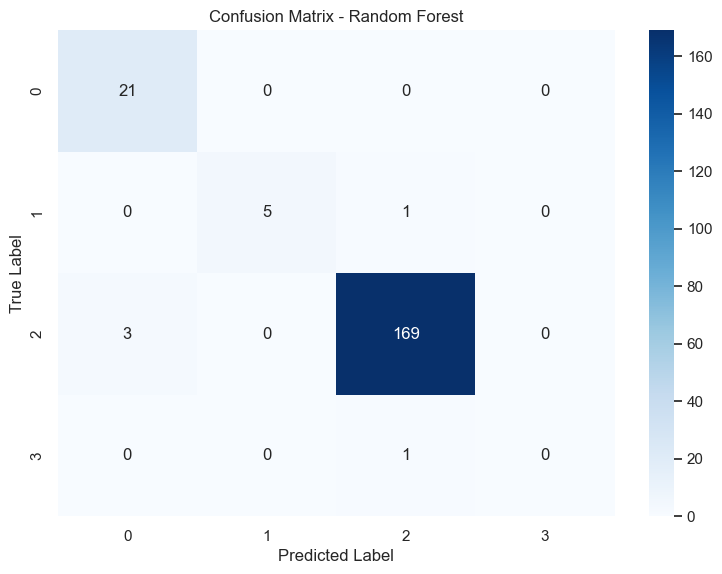


--------------------------------------------------
Evaluating Gradient Boosting...
Accuracy: 0.9450

Classification Report:
              precision    recall  f1-score   support

           N       1.00      0.81      0.89        21
           P       0.00      0.00      0.00         6
           Y       0.94      1.00      0.97       172
          Y        0.00      0.00      0.00         1

    accuracy                           0.94       200
   macro avg       0.48      0.45      0.47       200
weighted avg       0.91      0.94      0.93       200



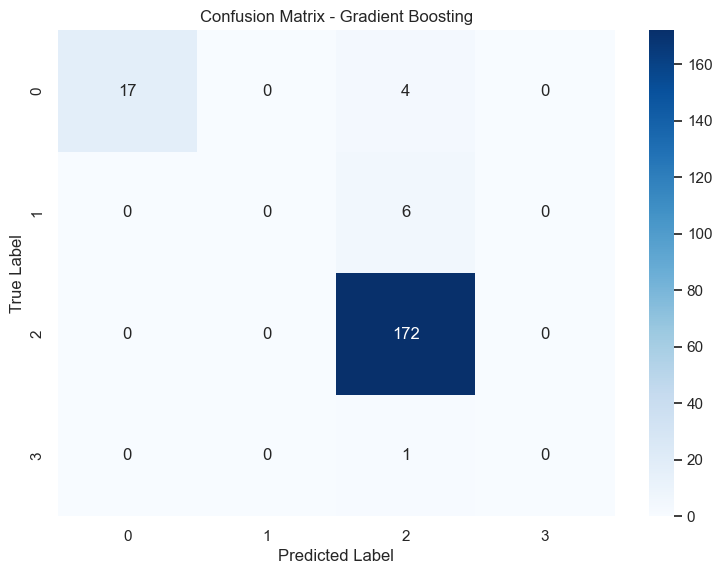

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define models
models = {
    'Logistic Regression': LogisticRegression(
        C=1.0,                    
        penalty='l2',               
        solver='liblinear',       
        max_iter=1000, 
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=50,           # Reduced number of trees
        max_depth=3,               # Limited tree depth
        min_samples_split=15,      # Increased min samples for node split
        min_samples_leaf=5,        # Increased min samples in leaf node
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=50,         
        learning_rate=0.01,        # Lower learning rate to prevent overfitting
        max_depth=2,               # Limited tree depth
        min_samples_split=15,
        min_samples_leaf=5,
        subsample=0.8,             # Use subset of training data samples
        random_state=42
    ),
}

# Dictionary to store results
results = {}

# Evaluate each model
for name, model in models.items():
    print(f"\n{'-'*50}\nEvaluating {name}...")
    
    # Train model
    model.fit(X_train_final, y_train)  # Use imputed data
    
    # Predictions
    y_pred = model.predict(X_test_final)  # Use imputed data
    
    # Rest of your code remains the same
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [42]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for each model and store results
cv_results = {}
for name, model in models.items():
    print(f"Performing cross-validation for {name}...")
    scores = cross_val_score(model, X_train_final, y_train, cv=5, scoring='accuracy')
    cv_results[name] = {
        'mean': scores.mean(),
        'std': scores.std()
    }

# Determine the best model name based on the highest accuracy
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]
best_cv_mean = cv_results[best_model_name]['mean']
best_cv_std = cv_results[best_model_name]['std']

# Print best model results
print(f"Best Model Performance Summary")
print("-" * 50)
print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {best_accuracy:.4f}")


Performing cross-validation for Logistic Regression...
Performing cross-validation for Random Forest...
Performing cross-validation for Gradient Boosting...
Best Model Performance Summary
--------------------------------------------------
Best Model: Random Forest
Test Accuracy: 0.9750


In [ ]:
train_accuracy = models[best_model_name].score(X_train_final, y_train)
test_accuracy = best_accuracy
cv_accuracy = best_cv_mean
cv_std = best_cv_std

train_test_diff = train_accuracy - test_accuracy
overfitting_threshold = 0.05  
cv_test_diff = abs(test_accuracy - cv_accuracy)

print(f"\nOverfitting Analysis:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"CV Accuracy: {cv_accuracy:.4f} ± {cv_std:.4f}")
print(f"Train-Test Difference: {train_test_diff:.4f}")
print(f"Test-CV Difference: {cv_test_diff:.4f}")

if train_test_diff > overfitting_threshold:
    if cv_test_diff <= cv_std:
        print("\nModel Status: ⚠️ Moderate overfitting detected")
        print("- Train accuracy much higher than test accuracy")
        print("- Test accuracy is consistent with CV scores")
        print("- Consider adding regularization or simplifying the model")
    else:
        print("\nModel Status: ❌ Severe overfitting detected")
        print("- Train accuracy much higher than test accuracy")
        print("- Test accuracy inconsistent with CV scores")
        print("- Model needs significant simplification or more data")
elif cv_test_diff > cv_std:
    print("\nModel Status: 🔍 Possible data leakage or distribution issues")
    print("- Train and test accuracy are close")
    print("- But test accuracy differs from CV scores")
    print("- Check for data leakage or distribution problems in the split")
else:
    print("\nModel Status: ✅ Good generalization - No overfitting")
    print("- Train and test accuracy are reasonably close")
    print("- Test accuracy is consistent with CV results")


Overfitting Analysis:
Training Accuracy: 0.9700
Testing Accuracy: 0.9750
CV Accuracy: 0.9425 ± 0.0061
Train-Test Difference: -0.0050
Test-CV Difference: 0.0325

Model Status: 🔍 Possible data leakage or distribution issues
- Train and test accuracy are close
- But test accuracy differs from CV scores
- Check for data leakage or distribution problems in the split


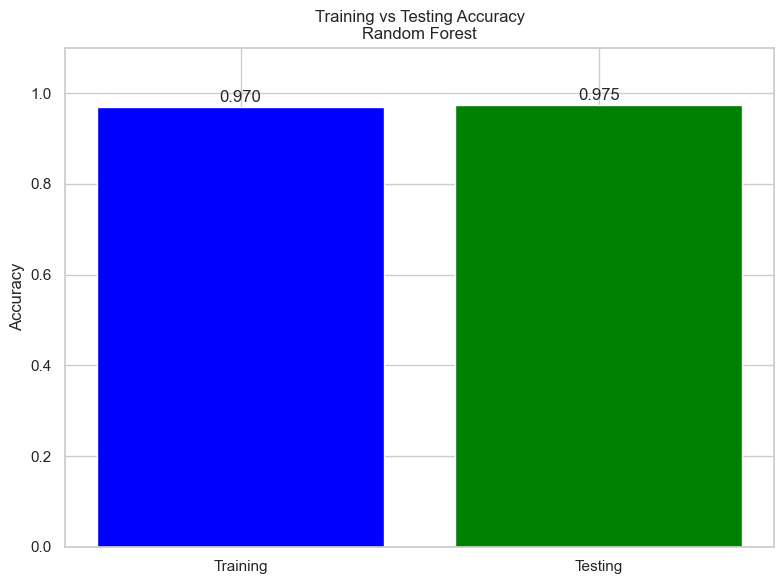

In [51]:
# Create a bar plot comparing training and testing accuracy for the best model
# Getting train accuracy for best model
train_accuracy = models[best_model_name].score(X_train_final, y_train)
test_accuracy = best_accuracy

plt.figure(figsize=(8, 6))

# Create bar plot comparing train and test accuracy
accuracies = [train_accuracy, test_accuracy]
labels = ['Training', 'Testing'] 
plt.bar(labels, accuracies, color=['blue', 'green'])

# Customize plot
plt.ylim(0, 1.1) 
plt.title(f'Training vs Testing Accuracy\n{best_model_name}')
plt.ylabel('Accuracy')

# Add value labels on top of bars
for x, y in enumerate(accuracies):
    plt.text(x, y + 0.01, f'{y:.3f}', ha='center')

plt.tight_layout()
plt.show()


--- Learning Curve Analysis for Random Forest ---


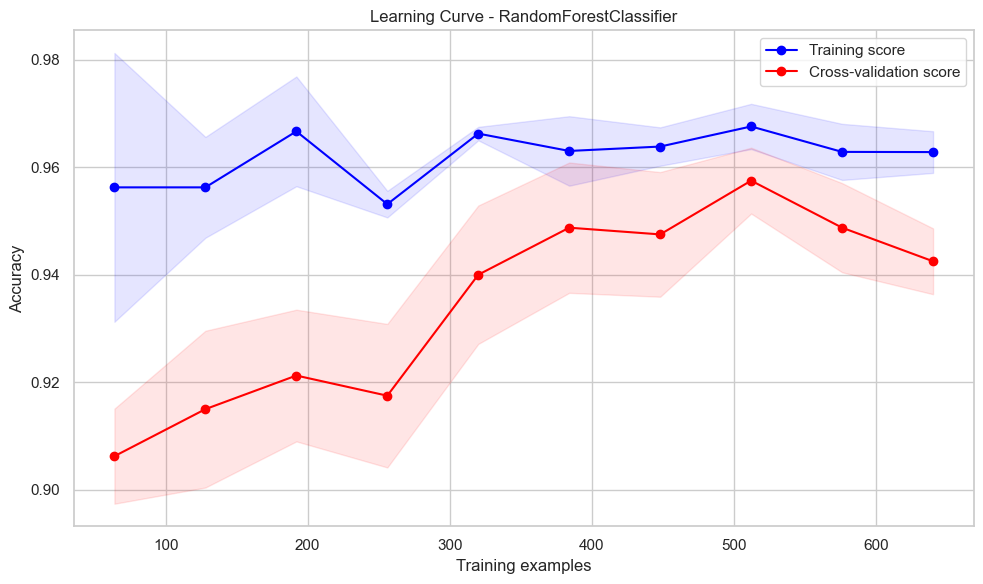

In [50]:
# Learning Curve Analysis
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy', n_jobs=-1
    )
    
    # Calculate mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                     alpha=0.1, color="blue")
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, 
                     alpha=0.1, color="red")
    
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, validation_mean, 'o-', color="red", label="Cross-validation score")
    
    plt.title(f"Learning Curve - {model.__class__.__name__}")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

# Retrieve the best model from the models dictionary
best_model = models[best_model_name]

# Generate learning curve for the best model
print(f"\n--- Learning Curve Analysis for {best_model_name} ---")
plot_learning_curve(best_model, X_train_final, y_train)

## Save and Load Model
Save the best model and scaler for future use, and demonstrate how to load them.

In [ ]:
# Save the best model and scaler
import joblib
import os

# Make sure the directory exists
os.makedirs('trainedModel', exist_ok=True)

# Get the name of the best model
best_model_name = max(results, key=results.get)

# Get the actual model object from the models dictionary
best_model = models[best_model_name]

# Save the best model and scaler
joblib.dump(best_model, 'trainedModel/best_diabetes_model.pkl')
print(f"Best model ({best_model_name}) saved as 'best_diabetes_model.pkl'")

# Save the scaler (important for preprocessing new data)
joblib.dump(scaler, 'trainedModel/scaler_diabetes.pkl')
print("Scaler saved as 'scaler_diabetes.pkl'")

Best model (Random Forest) saved as 'best_diabetes_model.pkl'
Scaler saved as 'scaler_diabetes.pkl'


## Test Model Manaully


✅ Model and scaler loaded successfully

DIABETES ASSESSMENT RESULTS:

Case 1: Patient 1 (Normal)
Status: Negative - Non-diabetic
Risk Level: Negative
Original Class: N
Key Indicators: HbA1c: 4.9, BMI: 22.5
Recommendation: Continue healthy lifestyle. Regular check-up in 1 year.
Class Probabilities: N: 0.96, P: 0.03, Y: 0.01
--------------------------------------------------

Case 2: Patient 2 (Borderline)
Status: Negative - Pre-diabetic
Risk Level: Low
Original Class: P
Key Indicators: HbA1c: 5.7, BMI: 26
Recommendation: Immediate lifestyle intervention. Follow-up in 3 months.
Class Probabilities: N: 0.02, P: 0.58, Y: 0.40
--------------------------------------------------

Case 3: Patient 3 (Pre-diabetic)
Status: Negative - Pre-diabetic
Risk Level: High
Original Class: P
Key Indicators: HbA1c: 5.8, BMI: 23
Recommendation: Immediate lifestyle intervention. Follow-up in 3 months.
Class Probabilities: N: 0.01, P: 0.94, Y: 0.05
--------------------------------------------------

Case 4: Pa

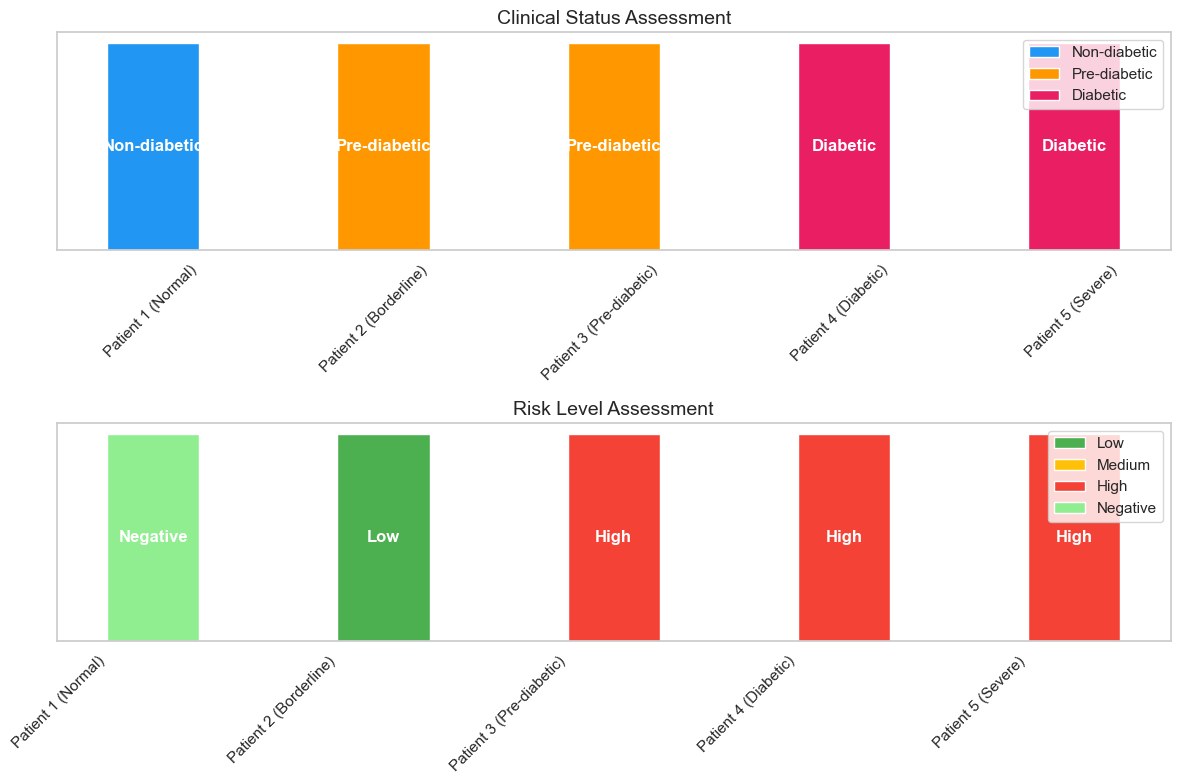

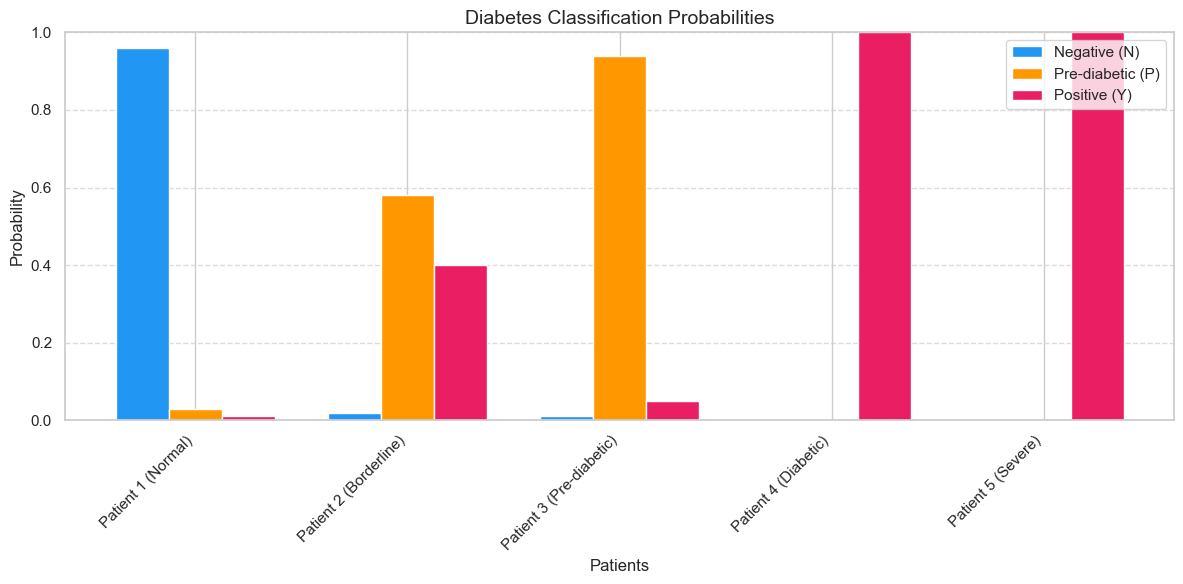

In [ ]:
# Function to predict diabetes with comprehensive risk assessment
def predict_diabetes_with_risk(patient_data, model=None, scaler=None):
    """
    Predicts diabetes status with detailed risk level assessment
    
    Args:
        patient_data: Dictionary with patient features
        model: Pre-loaded model (optional)
        scaler: Pre-loaded scaler (optional)
    
    Returns:
        dict: Complete assessment with prediction class, risk level, and probability
    """
    # Load the model and scaler if not provided
    if model is None or scaler is None:
        import joblib
        model = joblib.load('trainedModel/best_diabetes_model.pkl')
        scaler = joblib.load('trainedModel/scaler_diabetes.pkl')
    
    # Convert patient data to DataFrame
    import pandas as pd
    df = pd.DataFrame([patient_data])
    
    # Scale the input data
    df_scaled = pd.DataFrame(
        scaler.transform(df), 
        columns=df.columns
    )
    
    # Get prediction
    prediction = model.predict(df_scaled)[0]
    
    # Get probabilities if available
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(df_scaled)[0]
        
        # Extract probabilities for each class
        class_indices = {cls: idx for idx, cls in enumerate(model.classes_)}
        n_prob = probabilities[class_indices['N']] if 'N' in class_indices else 0
        p_prob = probabilities[class_indices['P']] if 'P' in class_indices else 0
        y_prob = probabilities[class_indices['Y']] if 'Y' in class_indices else 0
    else:
        # If model doesn't support probabilities, use dummy values
        n_prob = 0.33 if prediction == 'N' else 0
        p_prob = 0.33 if prediction == 'P' else 0
        y_prob = 0.33 if prediction == 'Y' else 0
    
    # Clinical values
    hba1c = patient_data['HbA1c']
    bmi = patient_data['BMI']
    
    # Determine risk level based on classification and clinical values
    # Determine risk level based on classification and clinical values
    if prediction == 'Y':
        # Positive case (has diabetes)
        binary_result = "Positive"
        status = "Diabetic"
        if y_prob > 0.9 or hba1c > 8.0:
            risk_level = "High"
        elif y_prob > 0.7 or hba1c > 7.0:
            risk_level = "Medium"
        else:
            risk_level = "Low"
        
    elif prediction == 'P':
    # Pre-diabetic case with variable risk based on clinical factors
        binary_result = "Negative"
        status = "Pre-diabetic"
    
        # Assess risk based on clinical factors
        if hba1c >= 6.0 or bmi >= 30 or p_prob > 0.9:
            risk_level = "High"
        elif hba1c >= 5.8 or bmi >= 27 or p_prob > 0.7:
            risk_level = "Medium"
        else:
            risk_level = "Low"  # Changed from "Low-Medium" to simply "Low"
    else:  # 'N' case
            # Negative case with variable risk
            binary_result = "Negative"
            status = "Non-diabetic"
            
            # Risk assessment based on probability and clinical values
            if p_prob > 0.3 or hba1c >= 5.7:
                risk_level = "Medium"
            elif bmi > 27 or y_prob > 0.1:
                risk_level = "Low"
            else:
                risk_level = "Negative"  # Very low risk
    # Generate recommendation
    if binary_result == 'Positive':
        if risk_level == 'High':
            recommendation = "Immediate medical attention required. Comprehensive diabetes management needed."
        elif risk_level == 'Medium':
            recommendation = "Medical consultation required. Medication may be needed."
        else:
            recommendation = "Medical consultation recommended. Early diabetes management needed."
    elif status == 'Pre-diabetic':
        recommendation = "Immediate lifestyle intervention. Follow-up in 3 months."
    else:  # Negative
        if risk_level == 'Medium':
            recommendation = "Lifestyle changes recommended. Follow-up in 6 months."
        elif risk_level == 'Low-Medium':
            recommendation = "Minor lifestyle adjustments recommended. Follow-up in 1 year."
        else:
            recommendation = "Continue healthy lifestyle. Regular check-up in 1 year."
    
    # Return comprehensive assessment
    return {
        'original_class': prediction,
        'binary_result': binary_result,
        'risk_level': risk_level,
        'clinical_status': status,
        'probabilities': {
            'N': n_prob,
            'P': p_prob,
            'Y': y_prob
        },
        'recommendation': recommendation,
        'key_indicators': {
            'HbA1c': hba1c,
            'BMI': bmi
        }
    }

def test_diabetes_risk_assessment():
    """
    Test function for diabetes risk assessment with visualization
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import joblib
    from matplotlib.patches import Patch
    
    # Load model and scaler
    try:
        model = joblib.load('trainedModel/best_diabetes_model.pkl')
        scaler = joblib.load('trainedModel/scaler_diabetes.pkl')
        print("✅ Model and scaler loaded successfully")
    except Exception as e:
        print(f"⚠️ Error loading model or scaler: {e}")
        print("⚠️ Using prediction without probabilities")
        model = scaler = None
    
    # Define test cases with different profiles
    test_cases = [
        # Case 1: Normal/Negative - Low Risk
        {
            'name': 'Patient 1 (Normal)',
            'data': {
                'Gender': 1,  # Female
                'AGE': 30,
                'Urea': 4.7,
                'Cr': 46,
                'HbA1c': 4.9,  # Normal
                'Chol': 4.2,
                'TG': 0.9,
                'HDL': 2.4,
                'LDL': 1.4,
                'VLDL': 0.5,
                'BMI': 22.5  # Normal weight
            }
        },
        # Case 2: Negative - Medium Risk
        {
            'name': 'Patient 2 (Borderline)',
            'data': {
                'Gender': 0,  # Male
                'AGE': 45,
                'Urea': 5.5,
                'Cr': 74,
                'HbA1c': 5.7,  # Borderline
                'Chol': 5.3,
                'TG': 1.3,
                'HDL': 1.0,
                'LDL': 3.7,
                'VLDL': 0.6,
                'BMI': 26  # Overweight
            }
        },
        # Case 3: Pre-diabetic - High Risk
        {
            'name': 'Patient 3 (Pre-diabetic)',
            'data': {
                'Gender': 0,  # Male
                'AGE': 42,
                'Urea': 5.4,
                'Cr': 53,
                'HbA1c': 5.8,  # Pre-diabetic range
                'Chol': 5.9,
                'TG': 3.7,
                'HDL': 1.3,
                'LDL': 3.1,
                'VLDL': 1.7,
                'BMI': 23
            }
        },
        # Case 4: Diabetic - Medium Risk
        {
            'name': 'Patient 4 (Diabetic)',
            'data': {
                'Gender': 0,  # Male
                'AGE': 55,
                'Urea': 5.66,
                'Cr': 61,
                'HbA1c': 7.7,  # Diabetic range
                'Chol': 4.7,
                'TG': 1.19,
                'HDL': 1.1,
                'LDL': 3.1,
                'VLDL': 8.1,
                'BMI': 32.9  # Obese
            }
        },
        # Case 5: Severe Diabetic - High Risk
        {
            'name': 'Patient 5 (Severe)',
            'data': {
                'Gender': 0,  # Male
                'AGE': 58,
                'Urea': 20.8,
                'Cr': 800,
                'HbA1c': 9.1,  # Severely elevated
                'Chol': 6.6,
                'TG': 2.9,
                'HDL': 1.1,
                'LDL': 4.3,
                'VLDL': 1.3,
                'BMI': 33  # Obese
            }
        }
    ]
    
    # Process each test case
    results = []
    
    print("\nDIABETES ASSESSMENT RESULTS:")
    print("=" * 60)
    
    for i, case in enumerate(test_cases, 1):
        patient_name = case['name']
        patient_data = case['data']
        
        # Get prediction with risk assessment
        result = predict_diabetes_with_risk(patient_data, model, scaler)
        
        # Store results for visualization
        results.append({
            'name': patient_name,
            'result': result
        })
        
        # Print detailed results
        print(f"\nCase {i}: {patient_name}")
        print(f"Status: {result['binary_result']} - {result['clinical_status']}")
        print(f"Risk Level: {result['risk_level']}")
        print(f"Original Class: {result['original_class']}")
        print(f"Key Indicators: HbA1c: {result['key_indicators']['HbA1c']}, BMI: {result['key_indicators']['BMI']}")
        print(f"Recommendation: {result['recommendation']}")
        
        if hasattr(model, 'predict_proba'):
            print(f"Class Probabilities: N: {result['probabilities']['N']:.2f}, " + 
                  f"P: {result['probabilities']['P']:.2f}, Y: {result['probabilities']['Y']:.2f}")
        
        print("-" * 50)
    
    # Create visualizations
    # 1. Bar chart showing risk levels by patient
    plt.figure(figsize=(12, 8))
    
    # Extract data for visualization
    patients = [r['name'] for r in results]
    status_data = [r['result']['clinical_status'] for r in results]
    risk_data = [r['result']['risk_level'] for r in results]
    
    risk_colors = {
        'Low': '#4CAF50',       # Green
        'Medium': '#FFC107',    # Amber
        'High': '#F44336',      # Red
        'Negative': '#90EE90'   # Light green (for very low risk)
    }
    
    # Define colors for different statuses
    status_colors = {
        'Non-diabetic': '#2196F3',  # Blue
        'Pre-diabetic': '#FF9800',   # Orange
        'Diabetic': '#E91E63'        # Pink
    }
    
    # Set up bar positions
    x = np.arange(len(patients))
    width = 0.4
    
    # Create first subplot - Clinical Status
    plt.subplot(2, 1, 1)
    
    status_bars = plt.bar(x - width/2, 
                     [1] * len(status_data),  # Fixed height
                     width, 
                     color=[status_colors[s] for s in status_data])
    
    # Add annotations to bars
    for i, status in enumerate(status_data):
        plt.text(i - width/2, 0.5, status, ha='center', va='center', 
                 color='white', fontweight='bold')
    
    plt.title('Clinical Status Assessment', fontsize=14)
    plt.xticks(x, patients, rotation=45, ha='right')
    plt.yticks([])  # Hide Y-axis
    plt.grid(False)
    
    # Add status legend
    status_legend = [Patch(facecolor=color, label=status) 
                     for status, color in status_colors.items()]
    plt.legend(handles=status_legend, loc='upper right')
    
    # Create second subplot - Risk Level
    plt.subplot(2, 1, 2)
    
    risk_bars = plt.bar(x + width/2, 
                   [1] * len(risk_data),  # Fixed height
                   width, 
                   color=[risk_colors[r] for r in risk_data])
    
    # Add annotations to bars
    for i, risk in enumerate(risk_data):
        plt.text(i + width/2, 0.5, risk, ha='center', va='center', 
                 color='white', fontweight='bold')
    
    plt.title('Risk Level Assessment', fontsize=14)
    plt.xticks(x, patients, rotation=45, ha='right')
    plt.yticks([])  # Hide Y-axis
    plt.grid(False)
    
    # Add risk legend
    risk_legend = [Patch(facecolor=color, label=risk) 
                   for risk, color in risk_colors.items()]
    plt.legend(handles=risk_legend, loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Create second chart with probabilities if available
    if hasattr(model, 'predict_proba'):
        plt.figure(figsize=(12, 6))
        
        # Extract probability data
        n_probs = [r['result']['probabilities']['N'] for r in results]
        p_probs = [r['result']['probabilities']['P'] for r in results]
        y_probs = [r['result']['probabilities']['Y'] for r in results]
        
        # Set up bar positions
        width = 0.25
        
        # Create bar chart for probabilities
        plt.bar(x - width, n_probs, width, label='Negative (N)', color='#2196F3')
        plt.bar(x, p_probs, width, label='Pre-diabetic (P)', color='#FF9800')
        plt.bar(x + width, y_probs, width, label='Positive (Y)', color='#E91E63')
        
        # Add labels and formatting
        plt.title('Diabetes Classification Probabilities', fontsize=14)
        plt.xlabel('Patients', fontsize=12)
        plt.ylabel('Probability', fontsize=12)
        plt.ylim(0, 1)
        plt.xticks(x, patients, rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    return results

# Run the test function
test_results = test_diabetes_risk_assessment()